In [7]:
import pandas as pd
import MyLib.nlp as nlp
import MyLib.HTML_prep as HTML_prep
import MyLib.analysis as analysis 
import MyLib.hype as hype 
from ipywidgets import interactive, interact

%load_ext autoreload
%autoreload 2

In [421]:
df=pd.read_json("2023-06-06_Zotero_AI_nlp_en2.json")
print(len(df))

df_publ=df.drop_duplicates(subset="FileKey")[["date","FileKey"]]
df_publ=df_publ.set_index("date").groupby(pd.Grouper(freq=freq)).count()
df_publ.columns=["Publications"]

1622


In [420]:
Counts

,publications,sentences
Uni,,
Delft University,22,97
Eindhoven University of Technoloy,27,202
Leiden University,40,123
Maastricht Univerisity,26,159
OpenUniversiteitNederland,12,32
Radboud Nijmegen,28,99
Rotterdam University,29,141
Tilburg University,12,63
University of Amsterdam,24,109


In [417]:
ChatGPT_Terms="ChatGPT, GPT3, GPT4, OpenAI, AI, LLM, A.I, GPT, Chatbot, technology, tool, app, Artificial Intelligence, Large Language Models"

Promise_terms="will, promise, definetly"
df.head()

,Uni,FileKey,url,date,Title,linkName,linkUrl,AI_paragraphs,text_clean,letters_count,word_count,language,source_language,pure_text,Lemmata,NoStopwords
0,Radboud Nijmegen,QJ4WZUBB,https://www.ru.nl/communicationscience/research/research-projects/,2023-01-01,Research projects - Communication Science,"[More information., Information Explosion, INtoEAT: Chatbot algorithms and coaching strategies for FoodCoach Liz, Media and Morality, MyMovez and SocialMovez: Social Network Health Campaigns, New reality and human-computer interaction, Social Human Agent Interaction, Tailored Persuasive Communication, Look Who’s Talking: Towards Engaging Long-Term Interactions with Conversational Agents, Understanding and reducing conformity to cyber aggression among adolescents in mobile messaging apps, An ...","[https://www.ru.nl/communicationscience/@960842/informatie-cookies/, https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/information/lost-world-ever/, https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/intoeat-chatbot-algorithms-and-coaching-strategies/intoeat-chatbot-algorithms-and-coaching-strategies/, https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/media-and-morality/media-moral/, https://www.ru.nl/communicatiewetenschap/onderz...",INtoEAT: Chatbot algorithms and coaching strategies for FoodCoach Liz,INtoEAT: Chatbot algorithms and coaching strategies for FoodCoach Liz,69,9,en,en,intoeat chatbot algorithms and coaching strategies for foodcoach liz,"[intoeat, chatbot, algorithm, and, coach, strategy, for, foodcoach, liz]","[intoeat, chatbot, algorithm, coach, strategy, foodcoach, liz]"
1,Radboud Nijmegen,QJ4WZUBB,https://www.ru.nl/communicationscience/research/research-projects/,2023-01-01,Research projects - Communication Science,"[More information., Information Explosion, INtoEAT: Chatbot algorithms and coaching strategies for FoodCoach Liz, Media and Morality, MyMovez and SocialMovez: Social Network Health Campaigns, New reality and human-computer interaction, Social Human Agent Interaction, Tailored Persuasive Communication, Look Who’s Talking: Towards Engaging Long-Term Interactions with Conversational Agents, Understanding and reducing conformity to cyber aggression among adolescents in mobile messaging apps, An ...","[https://www.ru.nl/communicationscience/@960842/informatie-cookies/, https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/information/lost-world-ever/, https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/intoeat-chatbot-algorithms-and-coaching-strategies/intoeat-chatbot-algorithms-and-coaching-strategies/, https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/media-and-morality/media-moral/, https://www.ru.nl/communicatiewetenschap/onderz...",Chatbot Usability - Studying the Impact of Chatbot Behaviour and User Acceptance (Marianna De Sa Siqueira),Chatbot Usability - Studying the Impact of Chatbot Behaviour and User Acceptance (Marianna De Sa Siqueira),106,16,en,en,chatbot usability studying the impact of chatbot behaviour and user acceptance marianna de sa siqueira,"[chatbot, usability, study, the, impact, of, chatbot, behaviour, and, user, acceptance, marianna, de, sa, siqueira]","[chatbot, usability, study, impact, chatbot, behaviour, user, acceptance, marianna, de, sa, siqueira]"
2,Radboud Nijmegen,K3P5X7U4,https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/intoeat-chatbot-algorithms-and-coaching-strategies/intoeat-chatbot-algorithms-and-coaching-strategies/,2023-01-01,INtoEAT: Chatbot algorithms and coaching strategies for FoodCoach Liz - Communicatiewetenschap,[],[],INtoEAT: Chatbot algorithms and coaching strategies for FoodCoach Liz - Communicatiewetenschap,INtoEAT: Chatbot algorithms and coaching strategies for FoodCoach Liz - Communicatiewetenschap,94,11,en,en,intoeat chatbot algorithms and coaching strategies for foodcoach liz communicatiewetenschap,"[intoeat, chatbot, algori

In [363]:


df["text_clean_f"]=df.text_clean.apply(nlp.filter_paragraphs,by=Promise_terms)
#df.text_clean_f.to_list()

In [364]:
df["NoStopwords_Set"]=df.NoStopwords.apply(lambda x: list(set(x)))
Lists=df.NoStopwords_Set.to_list()


In [365]:
Lists=df.NoStopwords.to_list()

Lists=[i for i in Lists if i!=None]
Words=[item for sublist in Lists for item in sublist]

from collections import Counter
a_counter = Counter(Words)
most_common = a_counter.most_common(10)

most_common



[('ai', 2642),
 ('chatgpt', 1762),
 ('chatbot', 1611),
 ('human', 975),
 ('work', 963),
 ('research', 922),
 ('student', 870),
 ('use', 852),
 ('datum', 787),
 ('university', 713)]

# Finding the most hyping articles

In [423]:
from nltk.tokenize import sent_tokenize

df["AI_sentences"]=df.AI_paragraphs.apply(sent_tokenize)

In [424]:
df=df.explode("AI_sentences").drop_duplicates(subset=["AI_sentences"]).dropna(subset=["AI_sentences"])


,publications,sentences
Uni,,
Delft University,22,331
Eindhoven University of Technoloy,27,770
Leiden University,40,428
Maastricht Univerisity,26,494
OpenUniversiteitNederland,12,119
Radboud Nijmegen,28,374
Rotterdam University,29,493
Tilburg University,12,234
University of Amsterdam,24,304


In [427]:
hype_selection=hype.hype_selection # OR: hype.Key_hypes

#hype_selection=hype.Key_hypes

df["hype_word"]=df.AI_sentences.apply(hype.hype_word,keys=hype_selection)
df["hype_sentence"]=df.AI_sentences.apply(hype.hype_sentence,keys=hype_selection)


df["hype_n"]=df.hype_word.apply(lambda x: len(x) if isinstance(x,list) else 0)
df=df.sort_values("hype_n", ascending=False)



In [429]:
df

,Uni,FileKey,url,date,Title,linkName,linkUrl,AI_paragraphs,text_clean,letters_count,word_count,language,source_language,pure_text,Lemmata,NoStopwords,AI_sentences,hype_word,hype_sentence,hype_n
825,Rotterdam University,DLDM929S,https://www.eur.nl/en/events/cli-networking-lunch-chatbot-goalsetting-2022-05-24,2022-05-24,CLI Networking Lunch | Chatbot & goalsetting | Erasmus University Rotterdam,[],[],"Designing, developing, and deploying a chatbot to support student goal settingOver the past few decades, higher education has seen a significant increase in the prevalence of technology enhanced learning. This shift has offered the opportunity to expand and grow both research and educational practice in many novel directions, but in these increasingly self-directed learning environments the need for students to be able to effectively self-regulate their learning is more important than ever.","Designing, developing, and deploying a chatbot to support student goal settingOver the past few decades, higher education has seen a significant increase in the prevalence of technology enhanced learning. This shift has offered the opportunity to expand and grow both research and educational practice in many novel directions, but in these increasingly self-directed learning environments the need for students to be able to effectively self-regulate their learning is more important than ever.",495,72,en,en,designing developing and deploying a chatbot to support student goal settingover the past few decades higher education has seen a significant increase in the prevalence of technology enhanced learning this shift has offered the opportunity to expand and grow both research and educational practice in many novel directions but in these increasingly selfdirected learning environments the need for students to be able to effectively selfregulate their learning is more important than ever,"[design, develop, and, deploy, a, chatbot, to, support, student, goal, settingover, the, past, few, decade, high, education, have, see, a, significant, increase, in, the, prevalence, of, technology, enhance, learn, this, shift, have, offer, the, opportunity, to, expand, and, grow, both, research, and, educational, practice, in, many, novel, direction, but, in, these, increasingly, selfdirecte, learning, environment, the, need, for, student, to, be, able, to, effectively, selfregulate, their,...","[design, develop, deploy, chatbot, support, student, goal, settingover, past, decade, high, education, see, significant, increase, prevalence, technology, enhance, learn, shift, offer, opportunity, expand, grow, research, educational, practice, novel, direction, increasingly, selfdirecte, learning, environment, need, student, able, effectively, selfregulate, learning, important]","This shift has offered the opportunity to expand and grow both research and educational practice in many novel directions, but in these increasingly self-directed learning environments the need for students to be able to effectively self-regulate their learning is more important than ever.","[important, novel, effectively]","[This shift has offered the opportunity to expand and grow both research and educational practice in many novel directions, but in these increasingly self-directed learning environments the need for students to be able to effectively self-regulate their learning is more important than ever.]",3
739,Rotterdam University,YVZNLR39,https://www.eur.nl/en/news/five-questions-marcel-van-oosterhout-deputy-executive-director-erasmus-centre-data-analytics-ecda,2023-04-25,"Five Questions with Marcel van Oosterhout, Deputy Executive Director of Erasmus Centre for Data Analytics (ECDA) | Erasmus University Rotterdam","[ECDAOpens external, AiPact, AI MAPS, ALGOSOCOpens external, MAGPIEOpens external, AI@EUROpens external, Erasmian Values, EUR CvB, RSMOpens external, ESSB, ConvergenceOpens external, RSM centresOpens external, Erasmus Centre for EntrepreneurshipOpens external, Erasmus Unive

Uni
Delft University                     15
Eindhoven University of Technoloy    36
Leiden University                    20
Maastricht Univerisity               37
OpenUniversiteitNederland             1
Radboud Nijmegen                     19
Rotterdam University                 82
Tilburg University                   13
University of Amsterdam              29
University of Groningen               6
University of Twente                 26
Utrecht University                   62
Vrije Universiteit Amsterdam         70
Wageningen University                15
Name: hype_n, dtype: int64

In [438]:

Counts=pd.DataFrame({"publications": df.drop_duplicates(subset="FileKey").value_counts("Uni"), 
                     "sentences":df.value_counts("Uni"),
                    "hypewords":df.groupby("Uni").sum()["hype_n"]})
Counts["mean hype-words"]=Counts["hypewords"]/Counts["sentences"]
Counts

,publications,sentences,hypewords,mean hype-words
Uni,,,,
Delft University,22,331,15,0.045317
Eindhoven University of Technoloy,27,770,36,0.046753
Leiden University,40,428,20,0.046729
Maastricht Univerisity,26,494,37,0.074899
OpenUniversiteitNederland,12,119,1,0.008403
Radboud Nijmegen,28,374,19,0.050802
Rotterdam University,29,493,82,0.166329
Tilburg University,12,234,13,0.055556
University of Amsterdam,24,304,29,0.095395


In [369]:
pd.options.display.max_colwidth = 500
hype_sentences=df.iloc[:12,-4:]
hype_sentences
hype_sentences.to_excel("hype_sentences.xlsx")

In [370]:
hype_sentences=df[['Uni','date',"hype_n","AI_sentences",'word_count','hype_word']]

In [371]:
hype_sentences["hype_ratio"]=hype_sentences["hype_n"]/hype_sentences["word_count"]
hype_sentences.sort_values(by="hype_ratio", ascending=False)

C:\Users\mr\AppData\Local\Temp\ipykernel_19016\2269154588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hype_sentences["hype_ratio"]=hype_sentences["hype_n"]/hype_sentences["word_count"]


,Uni,date,hype_n,AI_sentences,word_count,hype_word,hype_ratio
1777,University of Amsterdam,NaT,2,"I Fundamental AI research relevant to heritage data and collections, in close collaboration with the Faculty of Science and other computer science experts.",23,"[relevant, fundamental]",0.086957
423,University of Twente,2019-10-16,1,\n KnowBots: Discovering Relevant Patterns in Chatbot Dialogues\n — University of Twente Research Information,12,[relevant],0.083333
1758,Delft University,2022-11-21,1,1.1.5 Personalized dialogue management: Using reinforcement learning to improve your chatbot - TU Delft OCW,14,[reinforce],0.071429
1761,Delft University,2022-11-21,1,Home Courses AI in Practice: Applying AI Course materials Lectures 1.1.5 Personalized dialogue management: Using reinforcement learning to improve your chatbot,20,[reinforce],0.050000
825,Rotterdam University,2022-05-24,3,"This shift has offered the opportunity to expand and grow both research and educational practice in many novel directions, but in these increasingly self-directed learning environments the need for students to be able to effectively self-regulate their learning is more important than ever.",72,"[important, novel, effectively]",0.041667
...,...,...,...,...,...,...,...
1741,Delft University,2023-02-02,0,There’s a new AI in town that’s got everyone’s knickers in a twist.,106,None,0.000000
1741,Delft University,2023-02-02,0,"And if doomsayers are to be believed, ChatGPT might just be the last thing you ever see before it puts you out of action… er, I mean business.",106,None,0.000000
1738,Delft University,2014-01-01,0,"Computers in Human Behavior, 34, 58-68.",389,None,0.000000
1741,Delft University,2023-02-02,0,"The eloquent prose and nifty code snippets it spits out are often difficult to discern from the work of real scientists, journalists, and programmers.",106,None,0.000000


C:\Users\mr\AppData\Local\Temp\ipykernel_19016\981272799.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  hype_df[hype_df.index>pd.datetime(2022,1,1)]["Hypewords"].plot(title=f"n_hypewords peer {freq}",legend=True)
C:\Users\mr\AppData\Local\Temp\ipykernel_19016\981272799.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_publ[df_publ.index>pd.datetime(2022,1,1)]["Publications"].plot(legend=True)


<AxesSubplot: title={'center': 'n_hypewords peer M'}, xlabel='date'>

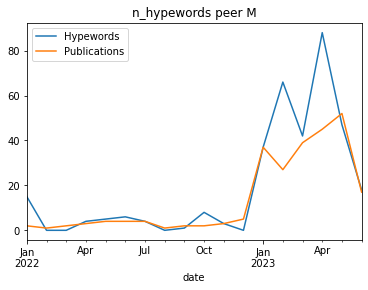

In [390]:
freq="M"

hype_time=hype_sentences.set_index("date").groupby(pd.Grouper(freq=freq))


hype_df=pd.DataFrame()
hype_df["Hypewords"]=hype_time["hype_n"].apply(lambda x: sum(x) if len(x)>0 else 0)
#hype_df["n"]=hype_time["hype_n"].apply(lambda x: len(x) if len(x)>0 else 0)

hype_df[hype_df.index>pd.datetime(2022,1,1)]["Hypewords"].plot(title=f"n_hypewords peer {freq}",legend=True)
df_publ[df_publ.index>pd.datetime(2022,1,1)]["Publications"].plot(legend=True)


In [238]:
hype_sentences["hype_ratio"].describe()


count    5807.000000
mean        0.000710
std         0.004262
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.111111
Name: hype_ratio, dtype: float64

In [216]:
hype_time=hype_sentences.set_index("date").groupby(pd.Grouper(freq='W'))
hype_time

In [441]:
from collections import Counter


keyWords="chatgpt,education,chatbot,university,create,write,produce,answer,tool,human,skill,knowledge,bias,assignment,intelligence,artificial,test,evaluate,assessment,plagiarism"
keyWords="education,chatbot,create,write,produce,answer,tool,human,skill,knowledge,bias,assignment,intelligence,artificial,test,evaluate,assessment,plagiarism"

keyWords=keyWords.split(",")
print(keyWords)

group=df.set_index("date").groupby(pd.Grouper(freq='M'))["NoStopwords"].sum()

Wordyear={}
Wordyear_exact={}
Wordyear_only={}
for i, row in group.iteritems():
    
    #print(i,row)
    if type(row)==list:
        
        ## filter ROW for interesting key-words:
        row=[i for i in row if i in keyWords]
        
        c=Counter(row).most_common(5)
        
        c_exact=[(i[0],i[1]/len(group)) for i in c]

        c=[(i[0],str(round(i[1]/len(group)*100,2))+"%") for i in c]
        c_only=[i[0] for i in c]


        Wordyear[str(i)]=c
        Wordyear_exact[str(i)]=c_exact
        Wordyear_only[str(i)]=c_only
        
        
        
    #print(c,"\n")
    
CountDF=pd.DataFrame.from_dict(Wordyear, orient='index').T


CountDF.T

['education', 'chatbot', 'create', 'write', 'produce', 'answer', 'tool', 'human', 'skill', 'knowledge', 'bias', 'assignment', 'intelligence', 'artificial', 'test', 'evaluate', 'assessment', 'plagiarism']


,0,1,2,3,4
1999-01-31 00:00:00,"(human, 7.48%)","(answer, 3.74%)","(produce, 3.74%)",None,None
2010-01-31 00:00:00,"(artificial, 1.36%)","(intelligence, 1.36%)","(human, 0.68%)",None,None
2011-06-30 00:00:00,"(knowledge, 2.04%)","(answer, 2.04%)",None,None,None
2012-08-31 00:00:00,"(chatbot, 3.74%)","(tool, 3.74%)","(evaluate, 3.74%)",None,None
2014-01-31 00:00:00,"(human, 38.44%)","(chatbot, 14.97%)","(artificial, 7.48%)","(intelligence, 7.48%)","(education, 7.48%)"
2016-01-31 00:00:00,"(chatbot, 1.36%)",None,None,None,None
2016-09-30 00:00:00,"(chatbot, 6.12%)","(artificial, 2.38%)","(answer, 1.7%)","(tool, 1.7%)","(create, 1.36%)"
2017-07-31 00:00:00,"(chatbot, 46.6%)","(human, 11.56%)","(write, 11.56%)",None,None
2018-02-28 00:00:00,"(chatbot, 0.68%)","(human, 0.34%)",None,None,None
2018-04-30 00:00:00,"(chatbot, 22.79%)","(test, 10.2%)","(human, 1.36%)",None,None


In [450]:
CountDF=pd.DataFrame.from_dict(Wordyear_only, orient='index').T
CountDF.T[CountDF.T.index>"2022-10-01"]

,0,1,2,3,4
2022-10-31 00:00:00,knowledge,artificial,intelligence,create,chatbot
2022-11-30 00:00:00,chatbot,None,None,None,None
2022-12-31 00:00:00,write,answer,human,artificial,intelligence
2023-01-31 00:00:00,write,tool,answer,chatbot,human
2023-02-28 00:00:00,chatbot,human,write,knowledge,skill
2023-03-31 00:00:00,answer,chatbot,write,create,tool
2023-04-30 00:00:00,human,create,education,knowledge,intelligence
2023-05-31 00:00:00,education,intelligence,artificial,chatbot,write
2023-06-30 00:00:00,intelligence,artificial,education,human,write


In [ ]:
df=df.drop_duplicates("text_clean")

In [ ]:
df

In [453]:
#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="sustainable",words_before=(0,10),words_after=(0,10))
def text_context(column=["text_clean","pure_text","NoStopwords","AI_sentences"],search_word="education",words_before=1,words_after=1):
    df[column].dropna().apply(analysis.Keyword_context,search_word=search_word.lower(),context=(words_before,words_after))


interactive(children=(Dropdown(description='column', options=('text_clean', 'pure_text', 'NoStopwords', 'AI_se…

In [454]:
# WORD _GRAPH ANALYSIS

G=analysis.Word_NetworkGen(df,n=300,column="NoStopwords")
G2=analysis.CleanGraph(G,removeIsolates=True,minDegree=2,only_largest_component=True)
#G2=G
analysis.writeNetworkHTML(G2,view=False)
print("see the network: The_network.html")

[(('ai', 'ai'), 57972), (('chatgpt', 'chatgpt'), 39778), (('chatbot', 'chatbot'), 33439), (('de', 'de'), 23056), (('ai', 'datum'), 18629)]
Cleaning Graph to minimum Degree 2.
Nodes count:  43
Edges count:  144
see the network: The_network.html


In [459]:
import networkx as nx
nx.write_gexf(G2, "NoStopwords")

In [620]:
df=pd.read_json("2023-06-06_Zotero_AI_nlp_en2.json")
links=df[["url","linkUrl"]].drop_duplicates(subset="url").explode("linkUrl")

In [621]:
def domain_From_url(url):
    if isinstance(url,str):
        domain=url.replace("https://","").replace("http://","").replace("www.","").split("/")[0].lstrip(".")
        domain=domain.rsplit("@",1)[-1].rsplit("%20",1)[-1]
        if domain.count(".")>1:
            domain=".".join(domain.rsplit(".",2)[-2:])
            print(domain)
        if "." in domain:
            return domain
    
    


links["source"]=links.url.apply(domain_From_url)
links["target"]=links.linkUrl.apply(domain_From_url).reindex()

ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
ru.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.nl
universiteitleiden.n

In [647]:
links=links.dropna(subset="target").dropna(subset="source")
links=links[~links["url"].apply(lambda x: "linkedin.com" in x)]
edgelist=(zip(links["source"], links["target"]))

links[links["source"]==None]
G = nx.from_edgelist(edgelist)
nx.write_gexf(G,"Links.gexf")

In [648]:
edgelist=(zip(links["source"], links["target"]))
edges=list(edgelist)

In [652]:
from collections import Counter
pd.DataFrame(Counter(edges).most_common(15))

,0,1
0,"(vu.nl, vu.nl)",229
1,"(tudelft.nl, tudelft.nl)",188
2,"(uu.nl, uu.nl)",171
3,"(utwente.nl, utwente.nl)",155
4,"(ru.nl, ru.nl)",128
5,"(tue.nl, tue.nl)",102
6,"(universiteitleiden.nl, universiteitleiden.nl)",92
7,"(wur.nl, wur.nl)",90
8,"(maastrichtuniversity.nl, maastrichtuniversity.nl)",86
9,"(eur.nl, eur.nl)",72


,url,linkUrl,source,target
0,https://www.ru.nl/communicationscience/research/research-projects/,https://www.ru.nl/communicationscience/@960842/informatie-cookies/,ru.nl,ru.nl
0,https://www.ru.nl/communicationscience/research/research-projects/,https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/information/lost-world-ever/,ru.nl,ru.nl
0,https://www.ru.nl/communicationscience/research/research-projects/,https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/intoeat-chatbot-algorithms-and-coaching-strategies/intoeat-chatbot-algorithms-and-coaching-strategies/,ru.nl,ru.nl
0,https://www.ru.nl/communicationscience/research/research-projects/,https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/media-and-morality/media-moral/,ru.nl,ru.nl
0,https://www.ru.nl/communicationscience/research/research-projects/,https://www.ru.nl/communicatiewetenschap/onderzoek/onderzoeksprojecten/mymovez-socialmovez-social-network-health/mymovez-socialmovez-social-network-health/,ru.nl,ru.nl
...,...,...,...,...
1880,https://tlc.uva.nl/article/de-impact-van-chatgpt-op-het-onderwijs/,https://communities.surf.nl/ai-in-education/artikel/chatgpt-verzameling-bronnen,uva.nl,surf.nl
1880,https://tlc.uva.nl/article/de-impact-van-chatgpt-op-het-onderwijs/,https://www.uva.nl/en/profile/m/i/s.milan/s.milan.html,uva.nl,uva.nl
1880,https://tlc.uva.nl/article/de-impact-van-chatgpt-op-het-onderwijs/,https://tlc.uva.nl/article-category/docentprofessionalisering/?faculty=7,uva.nl,uva.nl
1880,https://tlc.uva.nl/article/de-impact-van-chatgpt-op-het-onderwijs/,https://tlc.uva.nl/article/docenten-enthousiast-over-het-herontwerpen-van-hun-vak-bij-project-virtual-past-places-reinventing-the-classroom/,uva.nl,uva.nl


In [460]:
links=df.linkUrl.to_list()
links=[list(set(l))for l in links if type(l)==list]
links=[i for s in links for i in s if i!=None]
domains=[domain_From_url(i) for s in links for i in s if i!=None]

In [466]:
df["target_domain"]=df.linkUrl.apply(domain_From_url)

AttributeError: 'float' object has no attribute 'replace'

In [461]:

from collections import Counter
a_counter = Counter(links)
most_common = a_counter.most_common(15)
most_common

[('https://www.cursor.tue.nl/inschrijven/', 452),
 ('#', 407),
 ('https://www.facebook.com/vuamsterdam', 403),
 ('https://www.youvisit.com/tour/vuamsterdam', 403),
 ('https://www.youtube.com/user/vrijeuniversiteit', 403),
 ('https://twitter.com/VUamsterdam', 403),
 ('https://www.instagram.com/vuamsterdam/', 403),
 ('https://www.linkedin.com/school/vrije-universiteit-amsterdam/', 403),
 ('https://vu.nl/en/alumni', 355),
 ('https://vu.nl/en/about-vu', 355),
 ('https://vu.nl/en/about-vu/divisions/university-library', 355),
 ('https://studiegids.vu.nl/en', 355),
 ('https://vu.nl/en/education', 355),
 ('https://vu.nl/en/research', 355),
 ('https://workingat.vu.nl/home', 355)]

In [ ]:
links=df.linkUrl.to_list()

In [ ]:
Twitter_links=[i for i in links if "youtube" in i]
set(Twitter_links)

# Tilburg uses a lot of youtube - & shows male people discussing it while drinkin beer :D"